# Geometric Transformations

## Affine Transformations

### getAffineTransform

This [function](https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html?highlight=resize#getaffinetransform) calculates an affine transform from three pairs of the corresponding points.

```Python
cv2.getAffineTransform(Source, Destination) → retval
```

Parameters:	
* Source – Coordinates of triangle vertices in the source image.
* Destination – Coordinates of the corresponding triangle vertices in the destination image.

The function calculates the $2 \times 3$ matrix 

$$\begin{bmatrix} M_{11} & M_{12} & M_{13} \\M_{21} & M_{22} & M_{23}  \end{bmatrix}$$

### Image Wrap
Calculates a Applies an [affine transformation](https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html?highlight=warpaffine#warpaffine) to an image.

$$
\begin{bmatrix}
x'_i \\ y'_i \end{bmatrix} = 
\begin{bmatrix} M_{11} & M_{12} & M_{13} \\M_{21} & M_{22} & M_{23}  \end{bmatrix}\begin{bmatrix} x_i \\ y_i \\ 1 \end{bmatrix}
$$

We can define a map function as follows
$$
\text{map_matrix}(t_x, t_y) = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y  \end{bmatrix}
$$

<font color='Blue'><b>Example</b></font>:

We use the sklearn [image dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_sample_images.html#sklearn.datasets.load_sample_images) to demonstrate basic operations using Open CV.

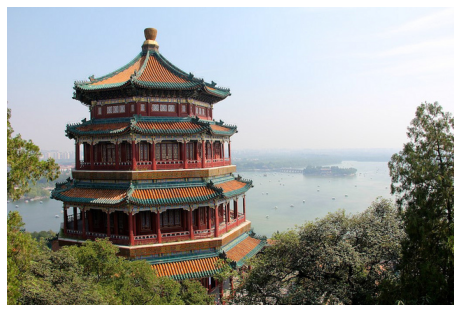

In [3]:
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

Img = load_sample_image('china.jpg')
fig, ax = plt.subplots(1, 1 , figsize = (8, 6))
font = FontProperties()
font.set_weight('bold')
_ = ax.imshow(Img)
_ = ax.axis('off')
_ = ax.set_aspect(1)

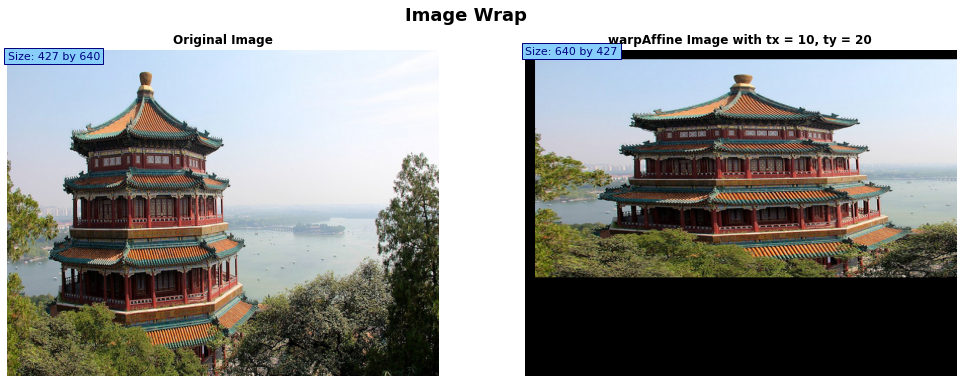

In [5]:
import numpy as np
def map_matrix(tx, ty):
    M = np.eye(3, dtype=float)[:2,:]
    M[:,-1] = [tx, ty]
    return M

import cv2
Out = cv2.warpAffine(Img, map_matrix(10,20) , Img.shape[:2])

fig, ax = plt.subplots(1, 2 , figsize = (17, 6))
ax = ax.ravel()
_ = fig.suptitle('Image Wrap', fontproperties=font, fontsize = 18)

_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image', fontproperties=font, fontsize = 12)
_ = ax[1].imshow(Out)
_ = ax[1].set_title('warpAffine Image with tx = 10, ty = 20', fontproperties=font, fontsize = 12)
for i in range(2):
    _ = ax[i].set_aspect('auto')
    _ = ax[i].axis('off')
del i
_ = ax[0].text(x = 0, y = int(0.02*Img.shape[1]), s = 'Size: %i by %i' % (Img.shape[0], Img.shape[1]),
               size=11, color = 'Navy', bbox=dict(boxstyle="square", ec='Navy',fc='LightSkyBlue'))
_ = ax[1].text(x = 0, y = int(0.02*Out.shape[1]), s = 'Size: %i by %i' % (Out.shape[0], Out.shape[1]),
               size=11, color = 'Navy', bbox=dict(boxstyle="square", ec='Navy',fc='LightSkyBlue'))

<font color='Blue'><b>Example</b></font>:

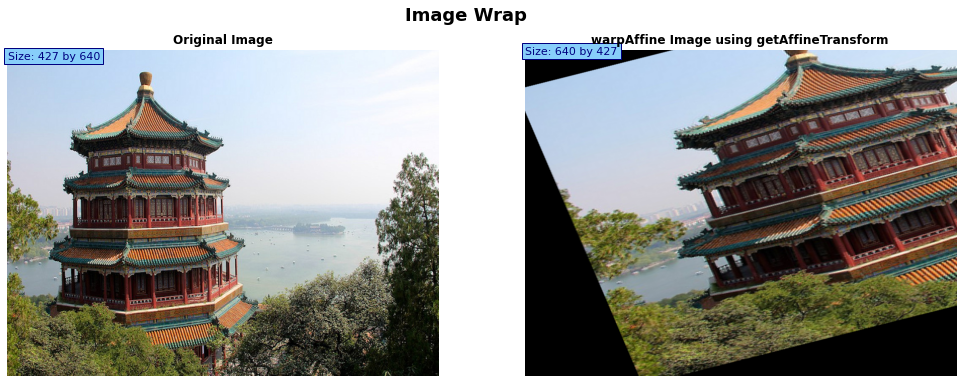

In [6]:
pts1 = np.float32([[10, 20], [150, 50], [50, 150]]) 
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])   
M = cv2.getAffineTransform(pts1, pts2) 
del pts1, pts2

Out = cv2.warpAffine(Img, M, Img.shape[:2]) 

fig, ax = plt.subplots(1, 2 , figsize = (17, 6))
ax = ax.ravel()
_ = fig.suptitle('Image Wrap', fontproperties=font, fontsize = 18)

_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image', fontproperties=font, fontsize = 12)
_ = ax[1].imshow(Out)
_ = ax[1].set_title('warpAffine Image using getAffineTransform', fontproperties=font, fontsize = 12)
for i in range(2):
    _ = ax[i].set_aspect('auto')
    _ = ax[i].axis('off')
del i
_ = ax[0].text(x = 0, y = int(0.02*Img.shape[1]), s = 'Size: %i by %i' % (Img.shape[0], Img.shape[1]),
               size=11, color = 'Navy', bbox=dict(boxstyle="square", ec='Navy',fc='LightSkyBlue'))
_ = ax[1].text(x = 0, y = int(0.02*Out.shape[1]), s = 'Size: %i by %i' % (Out.shape[0], Out.shape[1]),
               size=11, color = 'Navy', bbox=dict(boxstyle="square", ec='Navy',fc='LightSkyBlue'))

## Resize
[resizing](https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html?highlight=resize#cv2.resize) an image.

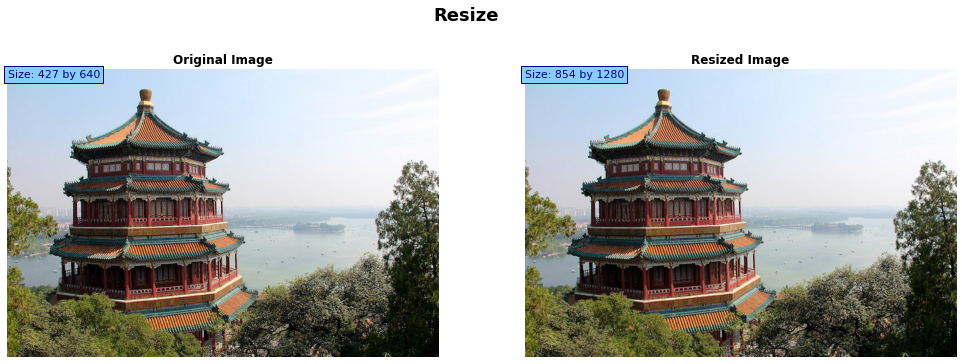

In [7]:
Out = cv2.resize(Img, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)

fig, ax = plt.subplots(1, 2 , figsize = (17, 6))
ax = ax.ravel()
_ = fig.suptitle('Resize', fontproperties=font, fontsize = 18)

_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image', fontproperties=font, fontsize = 12)
_ = ax[1].imshow(Out)
_ = ax[1].set_title('Resized Image', fontproperties=font, fontsize = 12)
for i in range(2):
    _ = ax[i].set_aspect(1)
    _ = ax[i].axis('off')
del i
_ = ax[0].text(x = 0, y = int(0.02*Img.shape[1]), s = 'Size: %i by %i' % (Img.shape[0], Img.shape[1]),
               size=11, color = 'Navy', bbox=dict(boxstyle="square", ec='Navy',fc='LightSkyBlue'))
_ = ax[1].text(x = 0, y = int(0.02*Out.shape[1]), s = 'Size: %i by %i' % (Out.shape[0], Out.shape[1]),
               size=11, color = 'Navy', bbox=dict(boxstyle="square", ec='Navy',fc='LightSkyBlue'))

## Warp Perspective

Applies a [perspective transformation](https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html?highlight=warpaffine#warpperspective) to an image.

Consider a matrix of a perspective transform

$$M = \begin{bmatrix} M_{11} & M_{12} & M_{13} \\M_{21} & M_{22} & M_{23}  \\M_{31} & M_{32} & M_{33} \end{bmatrix}$$

then
$$
\begin{bmatrix}
x'_i \\ y'_i \end{bmatrix} = 
\begin{bmatrix} \dfrac{M_{11} x + M_{12} y + M_{13}}{M_{31} x + M_{32} y + M_{33}}
\\\dfrac{M_{21} x + M_{22} y + M_{23}}{M_{31} x + M_{32} y + M_{33}}
\end{bmatrix}
$$

also [getPerspectiveTransform](https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html?highlight=getperspectivetransform#getperspectivetransform) calculates a perspective transform from four pairs of the corresponding points.

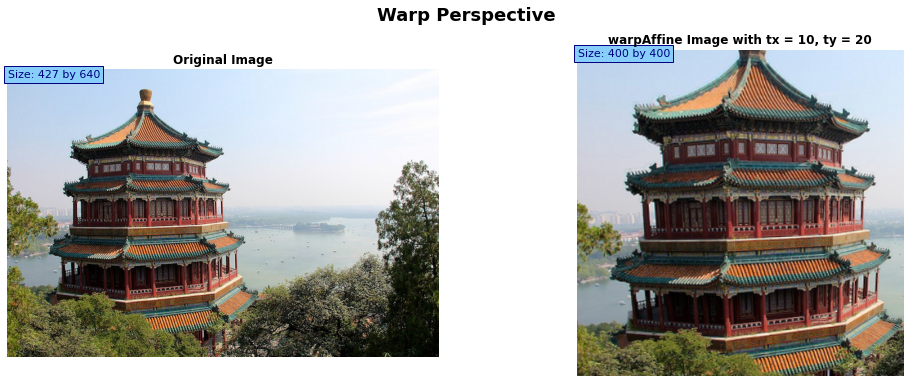

In [8]:
pts1 = np.float32([[50,60],[350, 50],[20, 380],[380, 400]])
pts2 = np.float32([[0,0],[400,0],[0,400],[400,400]])

M = cv2.getPerspectiveTransform(pts1,pts2)
Out = cv2.warpPerspective(Img,M, (400,400))

fig, ax = plt.subplots(1, 2 , figsize = (17, 6))
ax = ax.ravel()
_ = fig.suptitle('Warp Perspective', fontproperties=font, fontsize = 18)

_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image', fontproperties=font, fontsize = 12)
_ = ax[1].imshow(Out)
_ = ax[1].set_title('warpAffine Image with tx = 10, ty = 20', fontproperties=font, fontsize = 12)
for i in range(2):
    _ = ax[i].set_aspect(1)
    _ = ax[i].axis('off')
del i
_ = ax[0].text(x = 0, y = int(0.02*Img.shape[1]), s = 'Size: %i by %i' % (Img.shape[0], Img.shape[1]),
               size=11, color = 'Navy', bbox=dict(boxstyle="square", ec='Navy',fc='LightSkyBlue'))
_ = ax[1].text(x = 0, y = int(0.02*Out.shape[1]), s = 'Size: %i by %i' % (Out.shape[0], Out.shape[1]),
               size=11, color = 'Navy', bbox=dict(boxstyle="square", ec='Navy',fc='LightSkyBlue'))

## Camera Calibration

Some cheap cameras can introduce the **radial distortion** in which straight lines appear curved. This distortion is solved as follows:
$$
\begin{cases}
x_{corrected} = x (1 + k_1 r^2 + k_2 r^4 + k_3 r^6),\\
y_{corrected} = y (1 + k_1 r^2 + k_2 r^4 + k_3 r^6)
\end{cases}
$$
where $k_1$, $k_2$, and $k_3$ are distortion coefficients.

Another distortion is the **tangential distortion** that can occur due to the lens is not aligned perfectly parallel to the imaging plane. This distortion is solved as follows:

$$
\begin{cases}
x_{corrected} = x + [ 2p_1xy + p_2(r^2+2x^2)], \\
y_{corrected} = y + [ p_1(r^2+ 2y^2)+ 2p_2xy]
\end{cases}
$$
where $p_1$ and $p_2$ are distortion coefficients.


**Undistort** [function](https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html?highlight=resize#undistort) transforms an image to compensate for lens distortion.

```Python
cv2.undistort(Source, cameraMatrix, distCoeffs[, dst[, newCameraMatrix]]) → Destination
```
where 
* **cameraMatrix** is an input camera matrix $\begin{bmatrix} f_x & 0 & c_x\\ 0 & f_y & c_y \\ 0 & 0 & 1\end{bmatrix}$ with focal length $(f_x,f_y)$, and optical centers $(c_x, c_y)$ etc.
* **distCoeffs** is an input vector of distortion coefficients $(k_1, k_2, p_1, p_2[, k_3[, k_4, k_5, k_6]])$ of 4, 5, or 8 elements. If the vector is NULL/empty, the zero distortion coefficients are assumed.

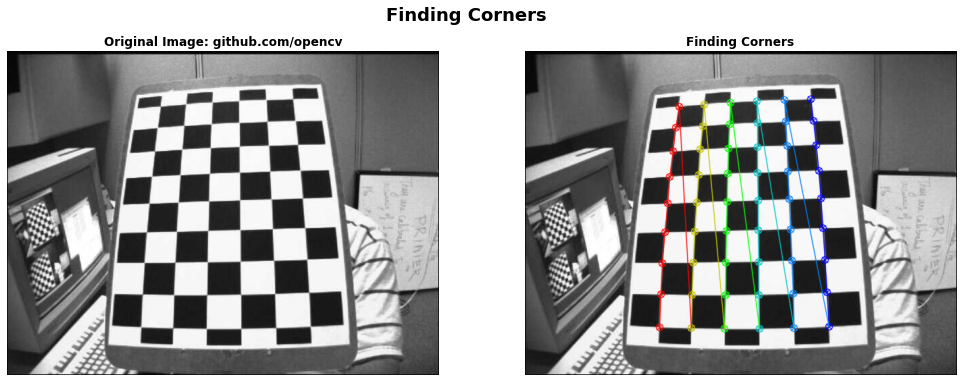

In [10]:
from skimage import io
Img = io.imread('https://github.com/opencv/opencv/blob/fc1a15626226609babd128e043cf7c4e32f567ca/samples/data/left12.jpg?raw=true')
Img = cv2.cvtColor(Img,cv2.COLOR_GRAY2RGB)

fig, ax = plt.subplots(1, 2 , figsize = (17, 6))
ax = ax.ravel()
_ = fig.suptitle('Finding Corners', fontproperties=font, fontsize = 18)
# Left Image
_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image: github.com/opencv', fontproperties=font, fontsize = 12)

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# number of inside corners along x and y directions 
nx = 9
ny = 6
gray = cv2.cvtColor(Img, cv2.COLOR_BGR2GRAY)

# prepare object points
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

# If found, draw corners
if ret == True:
    objpoints.append(objp)
    
    # Draw and display the corners
    cv2.drawChessboardCorners(Img, (nx, ny), corners, ret)
    _ = ax[1].imshow(Img)
    
    corners2 = cv2.cornerSubPix(gray, corners,(11,11),(-1,-1), criteria)
    imgpoints.append(corners2)
        
_ = ax[1].set_title('Finding Corners', fontproperties=font, fontsize = 12)

for i in range(2):
    _ = ax[i].set_aspect(1)
    _ = ax[i].axis('off')

For calibration, we can use [cv2.calibrateCamera()](https://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html#calibratecamera) function. It returns the camera matrix, distortion coefficients, rotation and translation vectors etc.

In [11]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

Now using undistort

In [12]:
Img = io.imread('https://github.com/opencv/opencv/blob/fc1a15626226609babd128e043cf7c4e32f567ca/samples/data/left12.jpg?raw=true')
Img = cv2.cvtColor(Img,cv2.COLOR_GRAY2RGB)

h,  w = Img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

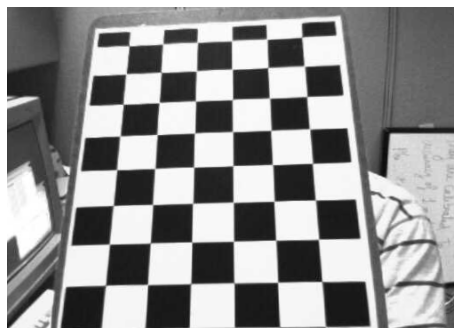

In [13]:
# undistort
mapx, mapy = cv2.initUndistortRectifyMap(mtx, dist, None, newcameramtx,(w,h),5)
dst = cv2.remap(Img, mapx, mapy, cv2.INTER_LINEAR)

# crop the image
x, y, w, h = roi
Out = dst[y:y+h, x:x+w]

fig, ax = plt.subplots(1, 1 , figsize = (8, 6))
_ = ax.imshow(Out)
_ = ax.set_aspect(1)
_ = ax.axis('off')

***

## Refrences
1. [OpenCV documentation](https://docs.opencv.org/2.4/index.html)
2. [OpenCV-Python Tutorials](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html#opencv-python-tutorials)
***